In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import cos, sin, log

In [45]:
f=open("иркутск.txt")
mass=[]
for line in f:
    mass+=[[float(i) for i in str(line).split()]]
#print(mass[:10])

# Номер 2(Полином Лагранжа)


In [46]:
global x2, y2

x2=[]
y2=[]
a=1

i=a
while len(x2)<13:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x2+=[mass[i][0]]
        y2+=[mass[i][6]]
    i+=1
print(x2)
print(y2)

[1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0]
[13.0, 15.1, 15.9, 15.6, 17.4, 17.4, 17.9, 15.0, 14.5, 14.9, 16.8, 15.5, 13.1]


In [47]:
def li2(i, a):
    l=1
    for j in range(len(y2)):
        if i!=j:
            l*=(a-x2[j])/(x2[i]-x2[j])
    return l

In [48]:
def L2(x1):
    m=[y2[i]*li2(i, x1) for i in range(len(y2))]
    s=0
    for elem in m:
        s+=elem
    return s

In [49]:
x1=np.arange(min(x2),max(x2)-0.9, 0.1)
y1=L2(x1)

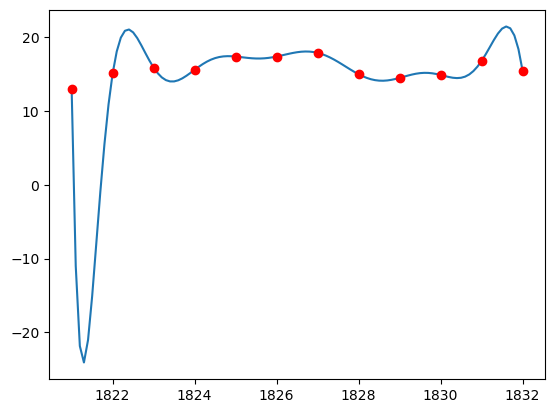

In [50]:
plt.plot(x1, y1)
plt.plot(x2[:len(x2)-1], y2[:len(x2)-1], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 3 (Iая интерполяционная формула Ньютона)

In [51]:
global x3, y3

x3=[]
y3=[]
a=10

i=a
while len(x3)<6:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x3+=[mass[i][0]]
        y3+=[mass[i][6]]
    else: print("нет информации в год", mass[i][0], "Выберете другой промежуток времени.")
    i+=1
    
print(x3)
print(y3)

[1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0]
[14.9, 16.8, 15.5, 13.1, 15.9, 14.2]


In [52]:
def dy0_n(y, n):
    if n==0: return y[0]
    dy=[ [0 for i in range(n)] for j in range(n)]
    dy[0]=[(y[i+1]- y[i]) for i in range(n)]
    for i in range(1, n):
        dy[i]=[dy[i-1][j+1] - dy[i-1][j] for j in range(n-i)]
    #return dy[n-1][0]
    return float(dy[n-1][0])

for i in range(6):
   print(dy0_n(y3, i))

14.9
1.9000000000000004
-3.200000000000001
2.1000000000000014
4.199999999999999
-20.200000000000003


In [53]:
def fact(n):
    l=1
    for i in range(1, n+1):
        l*=i
    return l

In [54]:
def li3(i, a):
    l=dy0_n(y3, i)/fact(i)
    q=a-x3[0]
    for j in range(i):
        l*=q-j
    return l

In [55]:
def L3(x):
    m=[li3(i, x) for i in range(len(y3))]
    s=0
    for elem in m:
        s+=elem
        #print(elem)
    return s

In [56]:
x1=np.arange(min(x3),max(x3)+0.1, 0.1)
y1=np.array([L3(elem) for elem in x1])

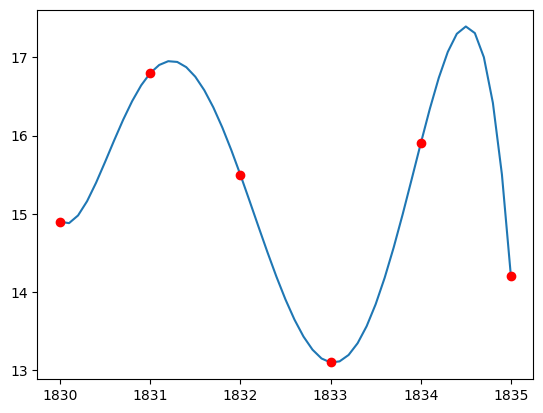

In [57]:
plt.plot(x1, y1)
plt.plot(x3[:len(x3)], y3[:len(x3)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 4 (II интерполяционная формула Ньютона)

In [58]:
global x4, y4

x4=[]
y4=[]
a=16

i=a
while len(x4)<6:
#for i in range(a, b+1):
    if mass[i][6]!=999.9:
        x4+=[mass[i][0]]
        y4+=[mass[i][6]]
    else: print("нет информации в год", mass[i][0], "Выберете другой промежуток времени.")
    i+=1
print(x4)
print(y4)

[1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0]
[15.0, 13.9, 15.9, 15.8, 15.8, 16.3]


In [59]:
def dyn_n(y, n):
    if n==0: return y[5]
    #dy=[ [0 for i in range(6)] for j in range(6)]
    dy=[[(y[i+1]- y[i]) for i in range(5)]]
    for i in range(1, 6):
        dy+=[[dy[i-1][j+1] - dy[i-1][j] for j in range(5-i)]]
    #return dy[n-1][0]
    return float(dy[n-1][5-n])

for i in range(6):
   print(dyn_n(y4, i))

16.3
0.5
0.5
0.40000000000000036
-1.799999999999999
-9.199999999999998


In [60]:
def li4(i, a):
    l=dyn_n(y4, i)/fact(i)
    q=a-x4[5]
    for j in range(i):
        l*=q+j
    return l

In [61]:
def L4(x):
    m=[li4(i, x) for i in range(len(y4))]
    s=0
    for elem in m:
        s+=elem
    return s

In [62]:
x1=np.arange(min(x4),max(x4)+0.1, 0.1)
y1=L4(x1)

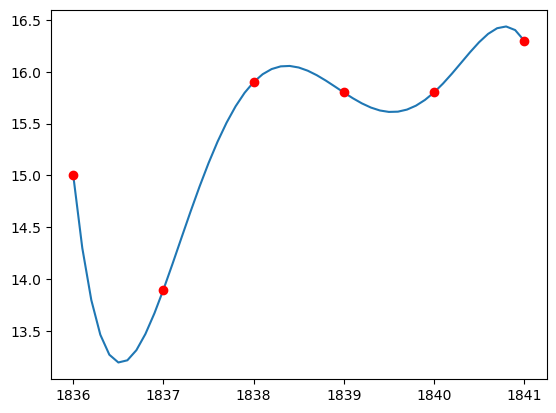

In [63]:
plt.plot(x1, y1)
plt.plot(x4[:len(x4)], y4[:len(x4)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])

# Номер 5 (Аппроксимация)

In [64]:
global x5, y5

x5=[]
y5=[]
a=1

i=a
y5=[elem[6] for elem in mass if elem[6]!=999.9]
x5=[elem[0] for elem in mass if elem[6]!=999.9]

print(x5)
print(y5)
print(len(x5), len(y5))

[1821.0, 1822.0, 1823.0, 1824.0, 1825.0, 1826.0, 1827.0, 1828.0, 1829.0, 1830.0, 1831.0, 1832.0, 1833.0, 1834.0, 1835.0, 1836.0, 1837.0, 1838.0, 1839.0, 1840.0, 1841.0, 1842.0, 1843.0, 1844.0, 1857.0, 1858.0, 1859.0, 1862.0, 1864.0, 1865.0, 1866.0, 1873.0, 1874.0, 1875.0, 1876.0, 1877.0, 1878.0, 1879.0, 1880.0, 1881.0, 1882.0, 1883.0, 1884.0, 1885.0, 1886.0, 1887.0, 1888.0, 1889.0, 1890.0, 1891.0, 1892.0, 1893.0, 1894.0, 1895.0, 1896.0, 1897.0, 1898.0, 1899.0, 1900.0, 1901.0, 1902.0, 1903.0, 1904.0, 1905.0, 1906.0, 1907.0, 1908.0, 1909.0, 1910.0, 1911.0, 1912.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0,

In [65]:
def sum_pow(x, p):
    s=0
    for elem in x:
        s+=elem**p
    return s

In [66]:
def sum2_pow(x, y, p):
    s=0
    for i in range(len(x)):
        s+=y[i]*x[i]**p
    return s

In [67]:
m=10
A=np.array([[sum_pow(x5, i+j) for i in range(m) ] for j in range(m)])
B=np.array([ sum2_pow(x5, y5, i) for i in range(m) ])
X=np.linalg.solve(A, B)
print(X)

global coef
coef=X
#print(A.dot(X))
#print(B)

[-4.81882836e+05  3.78425507e+02 -1.66884538e-02  2.91301235e-04
 -2.11267545e-07 -1.66310713e-10  1.35930371e-13  1.75386317e-17
 -2.98139195e-20  5.56931613e-24]


In [68]:
def f(x):
    t=[coef[i]*x**i for i in range(len(coef))]
    s=0
    for elem in t:
        s+=elem
    return s

In [69]:
x1=np.linspace(min(x5),max(x5), 9999)
y1=f(x1)

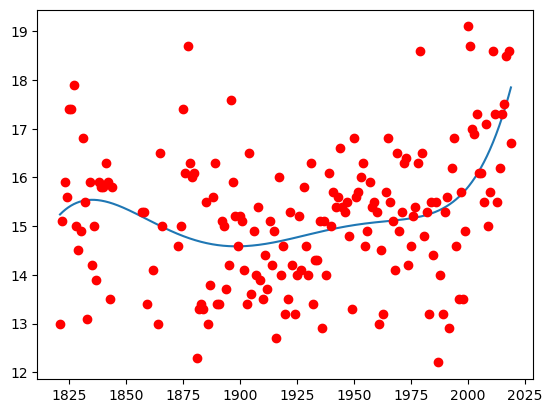

In [70]:
plt.plot(x1, y1)
plt.plot(x5[:len(x5)], y5[:len(x5)], 'ro')
#print(x[:len(x)-2], y[:len(x)-2])